In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# read data
data = pd.read_csv("final dataset/cleaned_data.csv", index_col = 0, header = 0)
# find out all qualified countries -> 128 countries in total
all_countries = data['Country'].unique().tolist()
print(len(all_countries))
df=data.drop(['Country', 'year'], axis=1)

128


In [3]:
# Descriptive Statistics
summary_CPI = df['CPI'].describe()
summary_feature = df[['Life expectancy at birth', 'Expected years of schooling', 'GNI per capita', 'Legal System & Property Rights', 'Size of Government']].describe()
print(summary_CPI)
print(summary_feature)

count    1121.000000
mean       45.709188
std        19.056148
min        14.000000
25%        31.000000
50%        40.000000
75%        58.000000
max        92.000000
Name: CPI, dtype: float64
       Life expectancy at birth  Expected years of schooling  GNI per capita  \
count               1121.000000                  1121.000000     1121.000000   
mean                  72.471207                    13.639547    20859.630375   
std                    8.177060                     3.045409    19451.191541   
min                   47.835400                     5.214410      735.737104   
25%                   65.786800                    11.520740     4863.976199   
50%                   74.482400                    13.865227    13790.711430   
75%                   79.223200                    15.659930    31285.912880   
max                   84.687900                    23.088921    94985.799790   

       Legal System & Property Rights  Size of Government  
count                    

                                       CPI  unemployment rate  \
CPI                               1.000000          -0.000132   
unemployment rate                -0.000132           1.000000   
Size of Government               -0.365501          -0.143682   
Legal System & Property Rights    0.898616           0.056245   
Sound Money                       0.490945          -0.009091   
Freedom to trade internationally  0.585654           0.034396   
Regulation                        0.642355           0.098207   
exports                          -0.023593          -0.030677   
net_loans                         0.164524          -0.068205   
Life expectancy at birth          0.664350           0.033728   
Expected years of schooling       0.721722           0.112361   
Mean years of schooling           0.678788           0.175555   
GNI per capita                    0.797932          -0.099295   

                                  Size of Government  \
CPI                              

/var/folders/7l/7mkg7y656rs1vbj3qqps28240000gn/T/ipykernel_92158/359679619.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


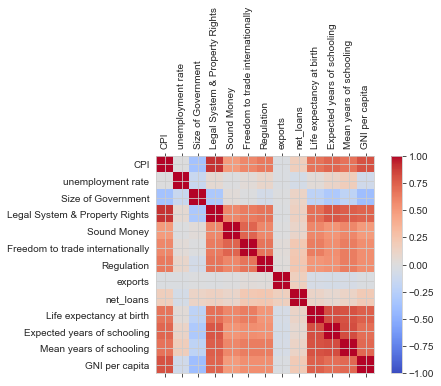

In [4]:
# find the correlation between those three varibales
corr = df.corr()
print(corr) # print the correlation matrix

# create a plot to show the correlations matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [5]:
# <split dataset 8:2 -> train(104 countries), test(26 countries)> randomly select countries
random.seed(24)
test_countries = random.sample(all_countries, k = 26)
train_countries = [c for c in all_countries if c not in test_countries]

Features = list(df.columns)
Features.remove('CPI')
#create test dataset
test_data = data[data['Country'] == test_countries[0]]
for i in range(1, len(test_countries)):
    test = data[data['Country'] == test_countries[i]]
    test_data = pd.concat([test_data, test], ignore_index=True)
test_data=test_data.drop(['year'], axis=1)
X_test = test_data[Features]
Y_test = test_data['CPI']
#create train dataset
train_data = data[data['Country'] == train_countries[0]]

for i in range(1, len(train_countries)):
    train = data[data['Country'] == train_countries[i]]
    train_data = pd.concat([train_data, train], ignore_index=True)
train_data=train_data.drop(['year'], axis=1)
X_train = train_data[Features]
Y_train = train_data['CPI']

In [6]:
# # different way to split data
# from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle
#
# Features = list(df.columns)
# Features.remove('CPI')
# #First, shuffle the rows of the dataframe.
# df_shuffled = shuffle(df, random_state = 2)
# #Split into training and testing data
# X_train, X_test, Y_train, Y_test = train_test_split(df_shuffled[Features],
#                                                     df_shuffled['CPI'],
#                                                     test_size=0.2,
#                                                     random_state =1)
#Next, rescale the features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [7]:
# Build Predictive Models
## Build logistic regression (lasso)
lasso_ = Lasso()
lasso_ = lasso_.fit(x_train_scaled, Y_train)
acc_score_lasso = lasso_.score(x_test_scaled, Y_test)
print(acc_score_lasso)

## Build a Decision tree regression
tree_ = tree.DecisionTreeRegressor()
tree_ = tree_.fit(x_train_scaled, Y_train)
acc_score_tree_ = tree_.score(x_test_scaled, Y_test)
print(acc_score_tree_)


## Build random forest regression
rfr = RandomForestRegressor()
rfr = rfr.fit(x_train_scaled, Y_train)
acc_score_rfr = rfr.score(x_test_scaled, Y_test)
print(acc_score_rfr)
rfr.get_params()

0.8332585931174539
0.7908160278949591
0.8319455468197992


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# cross validation -> tuning the models
#Create a dictionary to save optimal model
Optimal_model = {}
#Dictionary to save results
Score = {'tree':{}}

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
x_train_scaled = pd.DataFrame(x_train_scaled)
Y_train = Y_train.reset_index(drop=True)

#LASSO Term
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(x_train_scaled, Y_train)
print(f'Optimal alpha for the Lasso is {model.alpha_}')

#Tree CCP_alpha
for ccp_alpha in np.linspace(0.01, 0.5, num=200):
    dt = tree.DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    inner_scores = []
    for train_index, test_index in cv_outer.split(x_train_scaled):
        x_train, x_test = x_train_scaled.iloc[train_index,:], x_train_scaled.iloc[test_index,:]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        #Fit ML model
        dt.fit(x_train, y_train)
        #Compute score
        inner_scores.append(dt.score(x_test, y_test))
    score_bar = np.mean(inner_scores)
    Score['tree'][str(ccp_alpha)] =score_bar

max_tree = max(Score['tree'])
print(f'Optimal ccp_alpha for the decision tree is {max_tree}')

#Random forest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# grid search
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation,
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=10, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_scaled, Y_train)
best_random = rf_random.best_estimator_
print(f'Optimal parameters for the random forest is {best_random}')

Optimal alpha for the Lasso is 0.01654454115962282
Optimal ccp_alpha for the decision tree is 0.5
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterato

Optimal parameters for the random forest is RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=900)


In [9]:
# predict + evaluate
def predict (regressor, train_x, train_y, test_x, test_y):
    fit = regressor.fit(train_x, train_y)
    y_pred = fit.predict(test_x)
    # evaluate
    mse = mean_squared_error(test_y,y_pred)
    score_r2 = r2_score(test_y,y_pred)
    print('Model Performance')
    print('mse_test: ', mse)
    print('r2_test: ', score_r2)
    return y_pred, mse, score_r2

best_tree = tree.DecisionTreeRegressor(ccp_alpha = float(max_tree))
lasso_best = Lasso(alpha=model.alpha_)

lasso_accuracy = predict(lasso_best,x_train_scaled, Y_train, x_test_scaled, Y_test)
tree_accuracy = predict(best_tree, x_train_scaled, Y_train, x_test_scaled, Y_test)
random_accuracy = predict(best_random, x_train_scaled, Y_train, x_test_scaled, Y_test)

Model Performance
mse_test:  77.64713139796606
r2_test:  0.8356536197379398
Model Performance
mse_test:  93.93176335135155
r2_test:  0.8011858903156925
Model Performance
mse_test:  82.22924182718413
r2_test:  0.8259552155671098


logistic regression 
Legal System & Property Rights    14.398770
GNI per capita                     5.813936
Mean years of schooling            3.373530
Regulation                         0.906693
Sound Money                        0.853809
dtype: float64
 
Decision Tree 
Legal System & Property Rights    0.875246
Life expectancy at birth          0.052405
GNI per capita                    0.017666
Expected years of schooling       0.016113
Mean years of schooling           0.012126
dtype: float64
 
Random Forrest 


Text(0, 0.5, 'FEATURE NAMES')

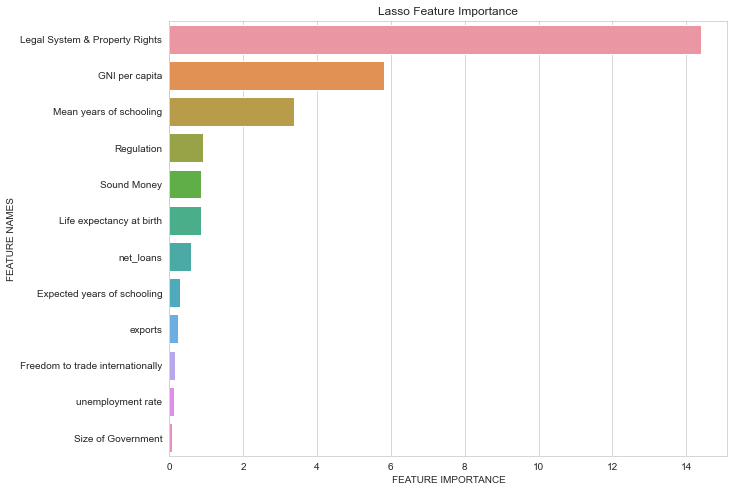

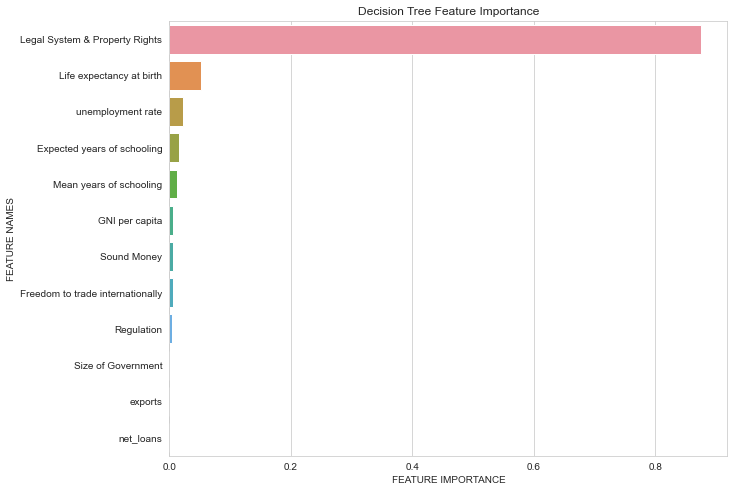

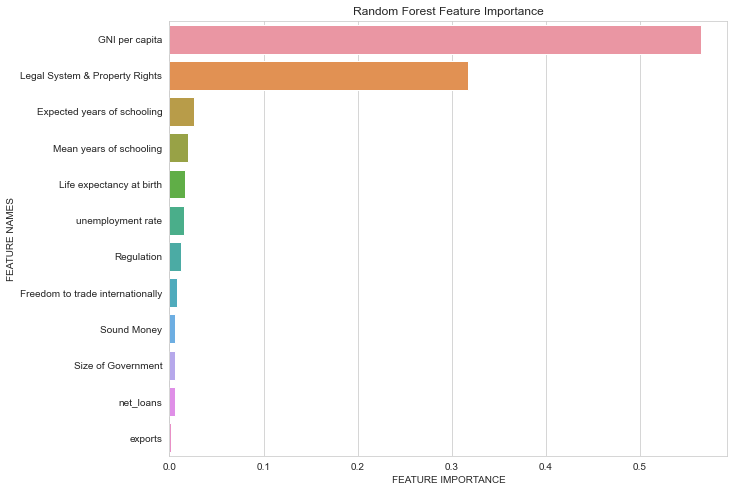

In [10]:
# find top 5 features

## get importance of lasso model
lasso_importances = pd.Series(
    np.abs(lasso_best.fit(x_train_scaled, Y_train).coef_), index=Features
).sort_values(ascending=False)
# coefficients = best_lasso.fit(x_train_scaled, Y_train).coef_
# importance = np.abs(coefficients)
print('logistic regression ')
print(lasso_importances[:5])
## bar plot
feature_importance_lasso = np.array(np.abs(lasso_best.fit(x_train_scaled, Y_train).coef_))
feature_names_lasso = np.array(Features)
data_lasso={'feature_names':feature_names_lasso,'feature_importance':feature_importance_lasso}
fi_df_lasso = pd.DataFrame(data_lasso)
fi_df_lasso.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df_lasso['feature_importance'], y=fi_df_lasso['feature_names'])
#Add chart labels
plt.title('Lasso ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

## Decision Tree
tree_importances = pd.Series(
    best_tree.fit(x_train_scaled, Y_train).feature_importances_, index=Features
).sort_values(ascending=False)
print(' ')
print('Decision Tree ')
print(tree_importances[:5])
## bar plot
feature_importance_tree = np.array(best_tree.fit(x_train_scaled, Y_train).feature_importances_)
feature_names_tree = np.array(Features)
data_tree={'feature_names':feature_names_tree,'feature_importance':feature_importance_tree}
fi_df_tree = pd.DataFrame(data_tree)
fi_df_tree.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df_tree['feature_importance'], y=fi_df_tree['feature_names'])
#Add chart labels
plt.title('Decision Tree ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

## Random Forest
rf_importances = pd.Series(
    best_random.fit(x_train_scaled, Y_train)[-1].feature_importances_, index=Features
).sort_values(ascending=False)
print(' ')
print('Random Forrest ')
## bar plot
feature_importance = np.array(best_random.fit(x_train_scaled, Y_train)[-1].feature_importances_)
feature_names = np.array(Features)
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('Random Forest ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

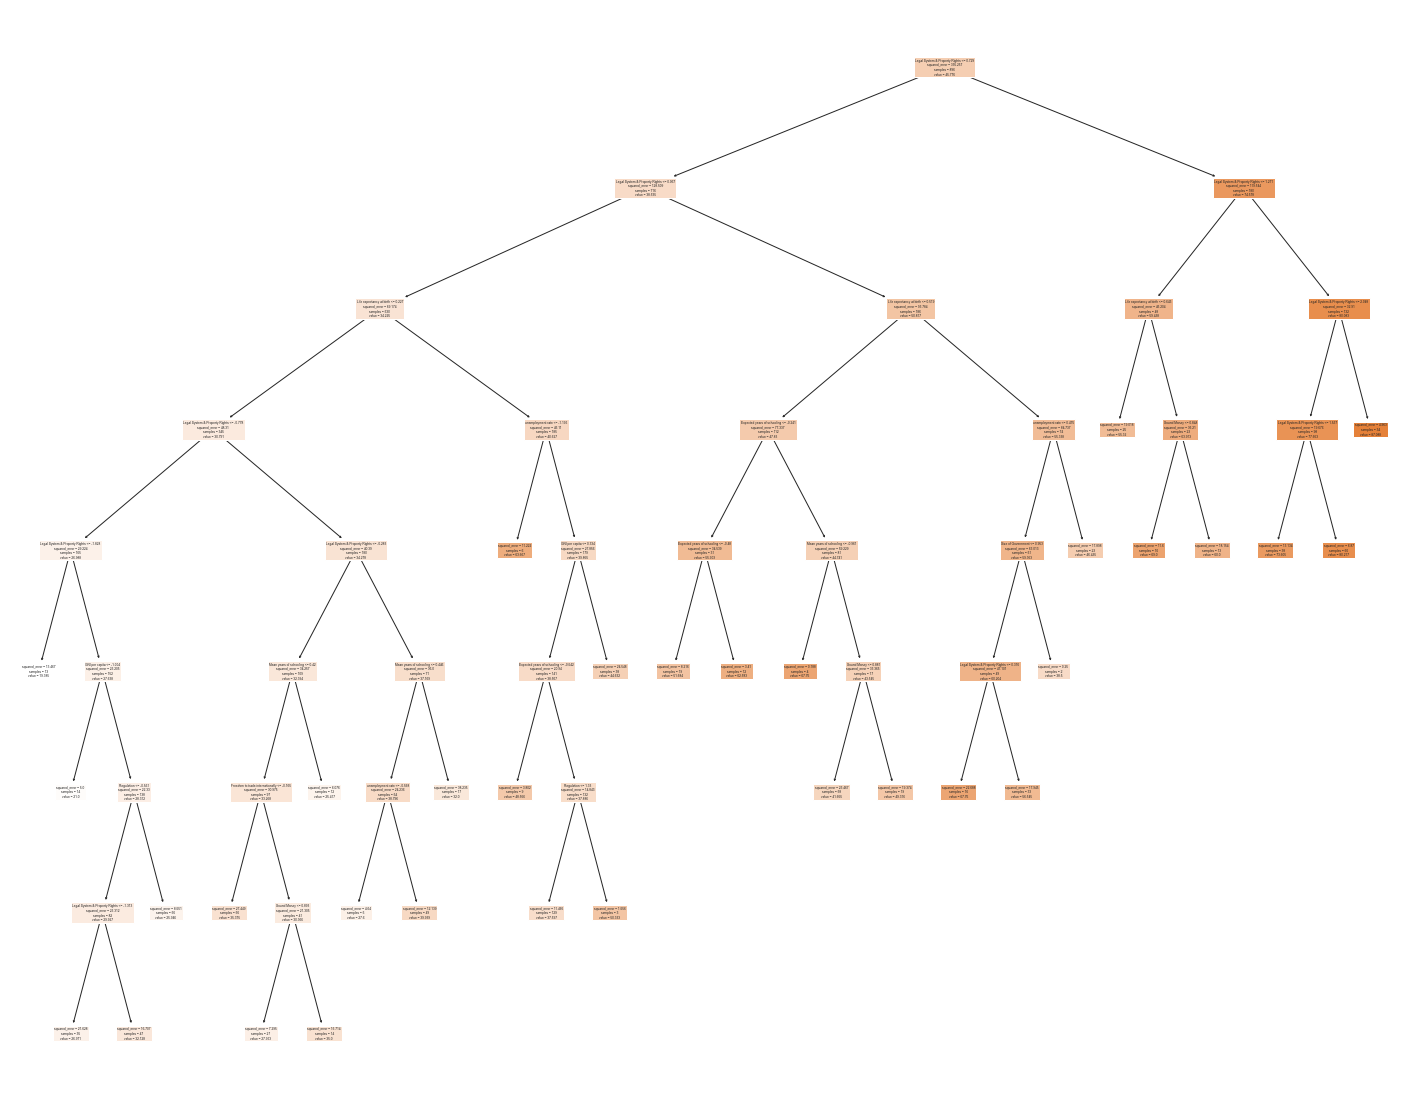

In [11]:
# plot decision tree
plt.figure(figsize=(25,20))
fig = tree.plot_tree(best_tree.fit(x_train_scaled, Y_train),
                     feature_names=Features,
                     class_names='Value',
                     filled=True)
regressor =  best_tree.fit(x_train_scaled, Y_train)

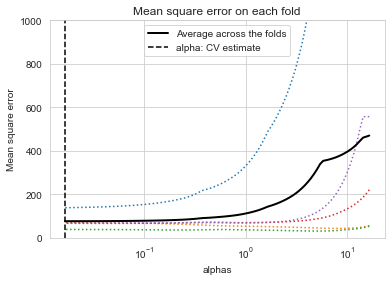

In [12]:
# plot with best alpha - lasso
lasso_best.fit(x_train_scaled, Y_train)

plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0, 1000
plt.ylim(ymin, ymax);